# Monthly Multiple Linear Regression Model


A multiple linear regression model of the impact of Sea Surfae Temperature, Glacial Melt, and Wind on Phytoplnakton off coast of West Greenland (Disko Bay) 

2 Months chosen: 
April and July

Imports: 

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Step 1: SST vs Chlorophyll 

In [29]:
# FUNCTION: to convert all monthly dates into decimal year value 
def YMD_to_DecYr(year,month,day,hour=0,minute=0,second=0):
    date = datetime.datetime(year,month,day,hour,minute,second)
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    decimal_fraction = float(date.toordinal() - start) / year_length
    dec_yr = year+decimal_fraction
    return(dec_yr)

Choose File Path and Extract Data 

In [30]:
# read in sst and chlor timeseries 
sst_file = "/Volumes/EVA_DELLEA/AQUA-STT-MONTHLY/sst_timeseries_monthly.csv"
chlor_file = "/Volumes/EVA_DELLEA/CHLOR-MONTHLY-TERA/chlor_timeseries_monthly.csv"

# skip header to read in data 
sst_timeseries = np.genfromtxt(sst_file, delimiter=',', skip_header = 1)
chlor_timeseries = np.genfromtxt(chlor_file, delimiter=',', skip_header = 1)

#sst_timeseries = sst_timeseries[np.logical_and(sst_timeseries[:,0] >= min_year, 
#                                               sst_timeseries[:,0] <= max_year), : ]
#chlor_timeseries = chlor_timeseries[np.logical_and(chlor_timeseries[:,0] >= min_year, 
#                                               chlor_timeseries[:,0] <= max_year), : ]


        ###CHOOSE WHICH MONTH TO EXAMINE VIA NUMBER VALUE ###



month = 8 #August 

#collect data for sst and chlor timeseries 
sst_timeseries_subset = []
chlor_timeseries_subset = []


#Choose range of time: 
for yr in range(2002, 2017):
    
    

#find first and last decimal day of the month 
        
    first_day_dec_yr = YMD_to_DecYr(yr,month,1)

    if month in [1,3,5,7,8,10,12]:
        number_of_days = 31 
    elif month in [4,6,9,11]:
        number_of_days = 30 
    else:
        if yr % 4 == 0:
            number_of_days = 29
        else:
            number_of_days = 28 

    last_day_dec_yr = YMD_to_DecYr(yr,month,number_of_days)
    
    month_index_sst = np.where(np.logical_and(sst_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              sst_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    month_index_chlor = np.where(np.logical_and(chlor_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              chlor_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    #print(month_index_sst, month_index_chlor)
    
    sst_timeseries_subset.append([sst_timeseries[month_index_sst[0][0] , 0],
                                                sst_timeseries[month_index_sst[0][0], 1]])
    
    chlor_timeseries_subset.append([chlor_timeseries[month_index_chlor[0][0] , 0],
                                                chlor_timeseries[month_index_chlor[0][0], 1]])


    
sst_timeseries_subset = np.array(sst_timeseries_subset)
chlor_timeseries_subset = np.array(chlor_timeseries_subset)

#print out timeseries to see data extrated 
#print(chlor_timeseries[:,0])

Plot the timeseries 

Text(0.5, 1.0, 'CHLOR')

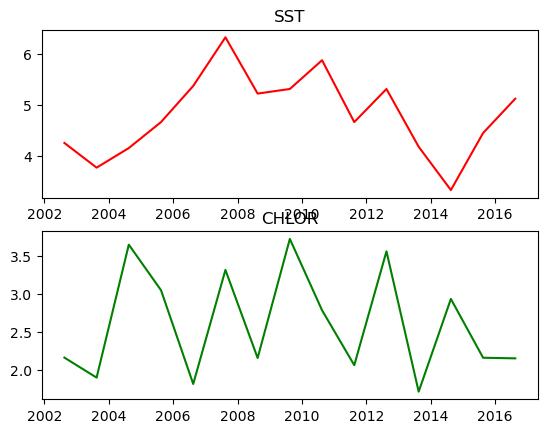

In [31]:
# Create subplot of sst
plt.subplot(2,1,1)
plt.plot(sst_timeseries_subset[:,0], sst_timeseries_subset[:,1],'r-')
plt.title('SST')

# Creat subplot of chlor
plt.subplot(2,1,2)
plt.plot(chlor_timeseries_subset[:,0], chlor_timeseries_subset[:,1], 'g-')
plt.title('CHLOR')

#Can print subset if needed to visualize the data set 
#print(sst_timeseries_subset)

Make a Scatterplot:

Text(0, 0.5, 'CHLOR')

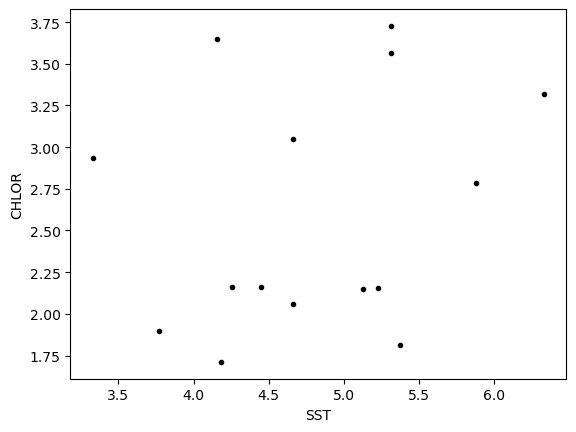

In [34]:
plt.plot(sst_timeseries_subset[:,1], chlor_timeseries_subset[:,1], 'k.')
plt.xlabel('SST')
plt.ylabel('CHLOR')


Create a 1D Linear Regression 

In [35]:
X = sst_timeseries_subset[:,1].reshape((len(sst_timeseries_subset[:,1]), 1))
                        
y = chlor_timeseries_subset[:,1]

In [36]:
print(X.shape)
print(y.shape)

(15, 1)
(15,)


Import

In [37]:
from sklearn import linear_model

In [38]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [39]:
coef = model.coef_

intercept = model.intercept_

Plot line of best fit 

Text(0, 0.5, 'CHLOR')

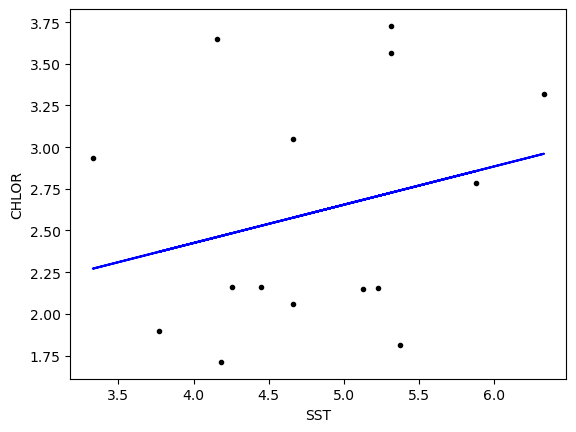

In [40]:
plt.plot(sst_timeseries_subset[:,1], coef*sst_timeseries_subset[:,1]+intercept, 'b-')
plt.plot(sst_timeseries_subset[:,1], chlor_timeseries_subset[:,1], 'k.')
plt.xlabel('SST')
plt.ylabel('CHLOR')

calculate R- squared value 

In [41]:
r_squared = model.score(X, y)
print(r_squared)

0.06743027278866598


## Step 2: Glacial Melt vs Chlorophyll 

In [42]:
# FUNCTION: Convert monthly values to Decimal year 
def YMD_to_DecYr(year,month,day,hour=0,minute=0,second=0):
    date = datetime.datetime(year,month,day,hour,minute,second)
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    decimal_fraction = float(date.toordinal() - start) / year_length
    dec_yr = year+decimal_fraction
    return(dec_yr)

In [43]:
# read in timeseries for glacial melt 

melt_file = "/Volumes/EVA_DELLEA/GLACIAL-DISCHARGE/melt_timeseries_monthly.csv"
chlor_file = "/Volumes/EVA_DELLEA/CHLOR-MONTHLY-TERA/chlor_timeseries_monthly.csv"


melt_timeseries = np.genfromtxt(melt_file, delimiter=',', skip_header = 1)
chlor_timeseries = np.genfromtxt(chlor_file, delimiter=',', skip_header = 1)

#min_year = 2003
#max_year = 2021

#sst_timeseries = sst_timeseries[np.logical_and(sst_timeseries[:,0] >= min_year, 
#                                               sst_timeseries[:,0] <= max_year), : ]
#chlor_timeseries = chlor_timeseries[np.logical_and(chlor_timeseries[:,0] >= min_year, 
#                                               chlor_timeseries[:,0] <= max_year), : ]


#subset data to a single month 

month = 8 #August 

melt_timeseries_subset = []
chlor_timeseries_subset = []

for yr in range(2002, 2017):
    
    

#find first and last decimal day of the month 


        
    first_day_dec_yr = YMD_to_DecYr(yr,month,1)

    if month in [1,3,5,7,8,10,12]:
        number_of_days = 31 
    elif month in [4,6,9,11]:
        number_of_days = 30 
    else:
        if yr % 4 == 0:
            number_of_days = 29
        else:
            number_of_days = 28 

    last_day_dec_yr = YMD_to_DecYr(yr,month,number_of_days)
    
    month_index_melt = np.where(np.logical_and(melt_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              melt_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    month_index_chlor = np.where(np.logical_and(chlor_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              chlor_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    #print(month_index_sst, month_index_chlor)
    
    melt_timeseries_subset.append([melt_timeseries[month_index_melt[0][0] , 0],
                                                melt_timeseries[month_index_melt[0][0], 1]])
    
    chlor_timeseries_subset.append([chlor_timeseries[month_index_chlor[0][0] , 0],
                                                chlor_timeseries[month_index_chlor[0][0], 1]])


    
melt_timeseries_subset = np.array(melt_timeseries_subset)
chlor_timeseries_subset = np.array(chlor_timeseries_subset)

#print(chlor_timeseries_subset)


melt_timeseries = np.genfromtxt(melt_file, delimiter=',', skip_header = 1)
chlor_timeseries = np.genfromtxt(chlor_file, delimiter=',', skip_header = 1)

print(melt_timeseries[:,0])



print(np.shape(melt_timeseries_subset))
print(np.shape(chlor_timeseries_subset))

[2000.03825137 2000.12295082 2000.20218579 2000.28688525 2000.36885246
 2000.45355191 2000.53551913 2000.62021858 2000.70491803 2000.78688525
 2000.8715847  2000.95355191 2001.03835616 2001.12328767 2001.2
 2001.28493151 2001.36712329 2001.45205479 2001.53424658 2001.61917808
 2001.70410959 2001.78630137 2001.87123288 2001.95342466 2002.03835616
 2002.12328767 2002.2        2002.28493151 2002.36712329 2002.45205479
 2002.53424658 2002.61917808 2002.70410959 2002.78630137 2002.87123288
 2002.95342466 2003.03835616 2003.12328767 2003.2        2003.28493151
 2003.36712329 2003.45205479 2003.53424658 2003.61917808 2003.70410959
 2003.78630137 2003.87123288 2003.95342466 2004.03825137 2004.12295082
 2004.20218579 2004.28688525 2004.36885246 2004.45355191 2004.53551913
 2004.62021858 2004.70491803 2004.78688525 2004.8715847  2004.95355191
 2005.03835616 2005.12328767 2005.2        2005.28493151 2005.36712329
 2005.45205479 2005.53424658 2005.61917808 2005.70410959 2005.78630137
 2005.8712328

Plot the timeseries

[[2.00262443e+03 2.16076303e+00]
 [2.00362443e+03 1.89656866e+00]
 [2.00462443e+03 3.65144682e+00]
 [2.00562443e+03 3.05003548e+00]
 [2.00662443e+03 1.81299233e+00]
 [2.00762443e+03 3.31793427e+00]
 [2.00862443e+03 2.15556240e+00]
 [2.00962443e+03 3.72726679e+00]
 [2.01062443e+03 2.78547764e+00]
 [2.01162443e+03 2.06075072e+00]
 [2.01262443e+03 3.56322646e+00]
 [2.01362443e+03 1.71151578e+00]
 [2.01462443e+03 2.93506908e+00]
 [2.01562443e+03 2.15900350e+00]
 [2.01662443e+03 2.15098190e+00]]


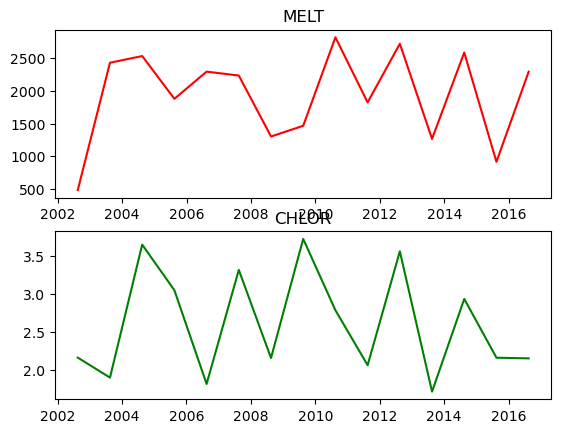

In [44]:
plt.subplot(2,1,1)
plt.plot(melt_timeseries_subset[:,0], melt_timeseries_subset[:,1],'r-')
plt.title('MELT')

plt.subplot(2,1,2)
plt.plot(chlor_timeseries_subset[:,0], chlor_timeseries_subset[:,1], 'g-')
plt.title('CHLOR')
print(chlor_timeseries_subset)

Make a scatter plot

Text(0, 0.5, 'CHLOR')

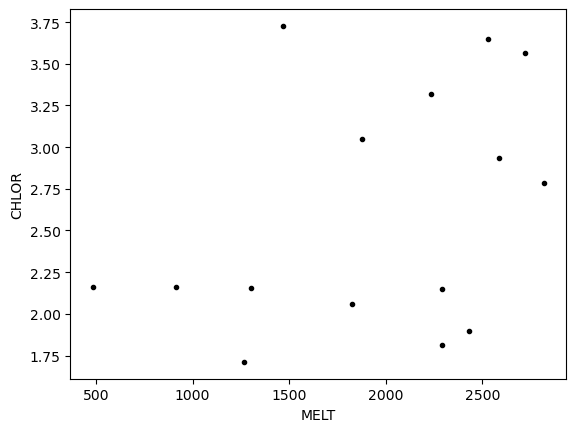

In [45]:
plt.plot(melt_timeseries_subset[:,1], chlor_timeseries_subset[:,1], 'k.')
plt.xlabel('MELT')
plt.ylabel('CHLOR')

Create a 1D linear regression 

In [46]:
X = melt_timeseries[:,1].reshape((len(melt_timeseries[:,1]), 1))
                        
y = chlor_timeseries[:,1]

In [47]:
#remove nan vals from chla_data_comp and remove the cooresponding entries from the other lists
#convert to numpy arrays

chla_data_comp = chlor_timeseries_subset[:,1]
chla_dates_comp = chlor_timeseries_subset[:,0]
melt_data_comp = melt_timeseries_subset[:,1]
melt_dates_comp = melt_timeseries_subset[:,0]

chla_data_comp_nonan = np.array(chla_data_comp)
chla_dates_comp_nonan = np.array(chla_dates_comp)
melt_data_comp_nonan = np.array(melt_data_comp)
melt_dates_comp_nonan = np.array(melt_dates_comp)
chla_data_comp_nonan = chla_data_comp_nonan[~np.isnan(chla_data_comp)]
chla_dates_comp_nonan = chla_dates_comp_nonan[~np.isnan(chla_data_comp)]
melt_data_comp_nonan = melt_data_comp_nonan[~np.isnan(chla_data_comp)]
melt_dates_comp_nonan = melt_dates_comp_nonan[~np.isnan(chla_data_comp)]

In [48]:
#### THIS IS WHERE THE MELT ISSUES START #### not correct numbers 

melt_timeseries_subset_nonan = np.column_stack([melt_dates_comp, melt_data_comp])
chla_timeseries_subset_nonan = np.column_stack([chla_dates_comp, chla_data_comp])

X = melt_timeseries_subset_nonan[:,1].reshape((len(melt_timeseries_subset_nonan[:,1]), 1))
                        
y = chla_timeseries_subset_nonan[:,1]

print(X.shape)
print(y.shape)

(15, 1)
(15,)


In [49]:
# Import: 
from sklearn import linear_model

In [50]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [51]:
coef = model.coef_

intercept = model.intercept_

Plot Line of best fit 

Text(0, 0.5, 'CHLOR')

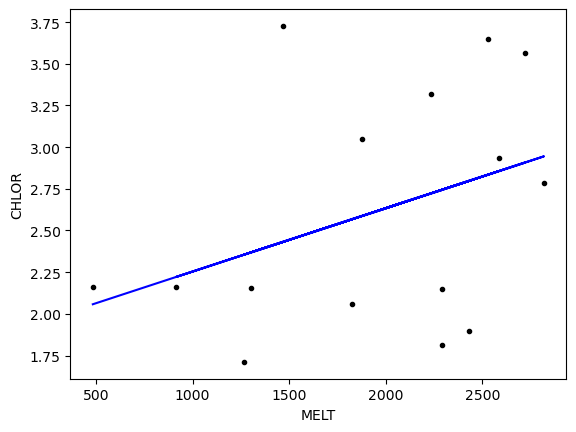

In [52]:
plt.plot(melt_timeseries_subset_nonan[:,1], coef*melt_timeseries_subset_nonan[:,1]+intercept, 'b-')
plt.plot(melt_timeseries_subset_nonan[:,1], chla_timeseries_subset_nonan[:,1], 'k.')
plt.xlabel('MELT')
plt.ylabel('CHLOR')

Calculate R-squared value 

In [53]:
r_squared = model.score(X, y)
print(r_squared)

0.14129037570642367


## Step 3: Wind Speed vs Chlorophyll 

In [92]:
def YMD_to_DecYr(year,month,day,hour=0,minute=0,second=0):
    date = datetime.datetime(year,month,day,hour,minute,second)
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    decimal_fraction = float(date.toordinal() - start) / year_length
    dec_yr = year+decimal_fraction
    return(dec_yr)

In [93]:
# read in timeseries
wind_file = "/Volumes/EVA_DELLEA/WIND-SPEED/wind_timeseries_monthly.csv"
chlor_file = "/Volumes/EVA_DELLEA/CHLOR-MONTHLY-TERA/chlor_timeseries_monthly.csv"


wind_timeseries = np.genfromtxt(wind_file, delimiter=',', skip_header = 1)
chlor_timeseries = np.genfromtxt(chlor_file, delimiter=',', skip_header = 1)

#min_year = 2003
#max_year = 2021

#sst_timeseries = sst_timeseries[np.logical_and(sst_timeseries[:,0] >= min_year, 
#                                               sst_timeseries[:,0] <= max_year), : ]
#chlor_timeseries = chlor_timeseries[np.logical_and(chlor_timeseries[:,0] >= min_year, 
#                                               chlor_timeseries[:,0] <= max_year), : ]


#subset data to a single month 

month = 8 #August 

wind_timeseries_subset = []
chlor_timeseries_subset = []
for yr in range(2002, 2016):
    
    

#find first and last decimal day of the month 


        
    first_day_dec_yr = YMD_to_DecYr(yr,month,1)

    if month in [1,3,5,7,8,10,12]:
        number_of_days = 31 
    elif month in [4,6,9,11]:
        number_of_days = 30 
    else:
        if yr % 4 == 0:
            number_of_days = 29
        else:
            number_of_days = 28 

    last_day_dec_yr = YMD_to_DecYr(yr,month,number_of_days)
    
    month_index_wind = np.where(np.logical_and(wind_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              wind_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    month_index_chlor = np.where(np.logical_and(chlor_timeseries[:,0] >= first_day_dec_yr - 0.001, 
                                              chlor_timeseries[:,0] <= last_day_dec_yr + 0.001))
    
    #print(month_index_sst, month_index_chlor)
    
    wind_timeseries_subset.append([wind_timeseries[month_index_wind[0][0] , 0],
                                                wind_timeseries[month_index_wind[0][0], 1]])
    
    chlor_timeseries_subset.append([chlor_timeseries[month_index_chlor[0][0] , 0],
                                                chlor_timeseries[month_index_chlor[0][0], 1]])


    
wind_timeseries_subset = np.array(wind_timeseries_subset)
chlor_timeseries_subset = np.array(chlor_timeseries_subset)

#print(chlor_timeseries_subset)



#print()


#print(np.shape(sst_timeseries_subset))
#print(np.shape(chlor_timeseries_subset))


Plot the timeseries

Text(0.5, 1.0, 'CHLOR')

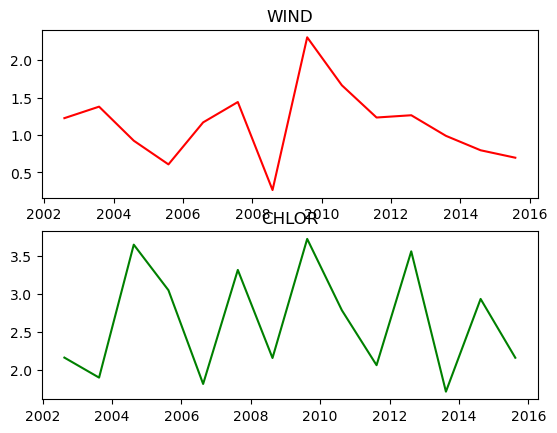

In [95]:
plt.subplot(2,1,1)
plt.plot(wind_timeseries_subset[:,0], wind_timeseries_subset[:,1],'r-')
plt.title('WIND')

plt.subplot(2,1,2)
plt.plot(chlor_timeseries_subset[:,0], chlor_timeseries_subset[:,1], 'g-')
plt.title('CHLOR')

#Print if needed to see 
#print(wind_timeseries_subset)

Make a scatterplot 

Text(0, 0.5, 'CHLOR')

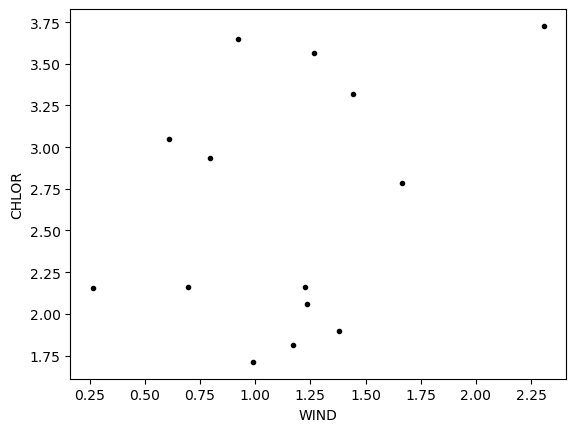

In [96]:
plt.plot(wind_timeseries_subset[:,1], chlor_timeseries_subset[:,1], 'k.')
plt.xlabel('WIND')
plt.ylabel('CHLOR')

Create a 1D Linear Regression 

In [97]:
X = wind_timeseries[:,1].reshape((len(wind_timeseries[:,1]), 1))
                        
y = chlor_timeseries[:,1]

In [98]:
#remove nan vals from chla_data_comp and remove the cooresponding entries from the other lists
#convert to numpy arrays

chla_data_comp = chlor_timeseries_subset[:,1]
chla_dates_comp = chlor_timeseries_subset[:,0]
wind_data_comp = wind_timeseries_subset[:,1]
wind_dates_comp = wind_timeseries_subset[:,0]

chla_data_comp_nonan = np.array(chla_data_comp)
chla_dates_comp_nonan = np.array(chla_dates_comp)
wind_data_comp_nonan = np.array(wind_data_comp)
wind_dates_comp_nonan = np.array(wind_dates_comp)
chla_data_comp_nonan = chla_data_comp_nonan[~np.isnan(chla_data_comp)]
chla_dates_comp_nonan = chla_dates_comp_nonan[~np.isnan(chla_data_comp)]
wind_data_comp_nonan = wind_data_comp_nonan[~np.isnan(chla_data_comp)]
wind_dates_comp_nonan = wind_dates_comp_nonan[~np.isnan(chla_data_comp)]

In [99]:
wind_timeseries_subset_nonan = np.column_stack([wind_dates_comp, wind_data_comp])
chla_timeseries_subset_nonan = np.column_stack([chla_dates_comp, chla_data_comp])

X = wind_timeseries_subset_nonan[:,1].reshape((len(wind_timeseries_subset_nonan[:,1]), 1))
                        
y = chla_timeseries_subset_nonan[:,1]

print(X.shape)
print(y.shape)

(14, 1)
(14,)


In [100]:
# Import: 
from sklearn import linear_model

In [101]:
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [102]:
coef = model.coef_

intercept = model.intercept_

Plot line of best fit 

Text(0, 0.5, 'CHLOR')

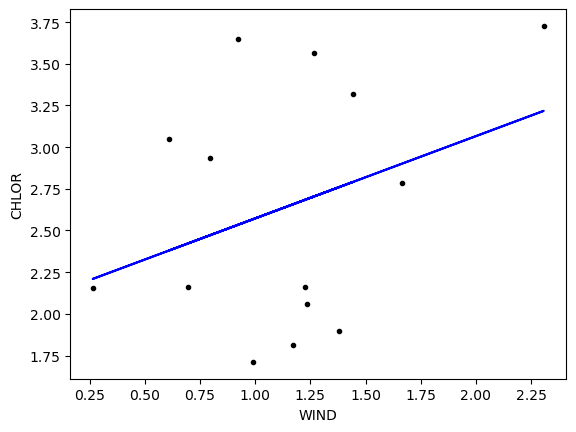

In [103]:
plt.plot(wind_timeseries_subset_nonan[:,1], coef*wind_timeseries_subset_nonan[:,1]+intercept, 'b-')
plt.plot(wind_timeseries_subset_nonan[:,1], chla_timeseries_subset_nonan[:,1], 'k.')
plt.xlabel('WIND')
plt.ylabel('CHLOR')

Calculate R-squared value 

In [104]:
r_squared = model.score(X, y)
print(r_squared)

0.11446766097599492


## Step 4: Fit Multi-linear Model

Imports 

In [78]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [79]:
# choose file path: 
file = '/Volumes/EVA_DELLEA/monthly-model/monthy_model.csv'
df = pd.read_csv(file)

#print(df)
#define variables
features = ['MELT', 'SST', 'WIND']
target = 'CHLOR'

#loop through all months 
X = []
y = []
for index,row in df.iterrows():
    dec_yr = row['dec_yr']
    MELT = row['MELT']
    SST = row['SST']
    WIND = row['WIND']
    CHLOR = row['CHLOR']
    
    # as long as none of the values are nan - include in model 
    if ~np.isnan(MELT) and ~np.isnan(SST) and ~np.isnan(WIND) and ~np.isnan(CHLOR):
        X.append([MELT,SST,WIND])
        y.append([CHLOR])
        
    # check: see if dec_yr has desired month 

X = np.array(X)
y = np.array(y)
print(np.shape(X))
print(np.shape(y))
    
    #print(row['MELT'])
#X = df[features].values.reshape(-1, len(features))
#y = df[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

(34, 3)
(34, 1)


In [80]:
model.coef_

array([[6.90662805e-05, 2.33636497e-01, 2.86335555e-01]])

In [81]:
model.intercept_

array([0.92187509])

In [82]:
model.score(X, y)

0.28176550594131244